In [1]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

Load the data

In [2]:
cwd = os.getcwd()
df = pd.read_parquet(os.path.join(cwd, 'data', 'shots.parquet'))

Show all the columns

In [3]:
pd.set_option("display.max_columns", None)
df.head()

,match_id,dataset,statsbomb_id,wyscout_id,statsbomb_team_id,wyscout_team_id,team_id,team_name,player_id_statsbomb,player_id_wyscout,player_id,Name,firstName,middleName,lastName,competition_gender,competition_name,competition_type,match_week,competition_part,H_A_column,minute,match_moment,x,y,visible_angle,middle_angle,distance_to_goal,distance_visible_angle,log_distance_to_goal,shot_type_name,shot_one_on_one,shot_open_goal,under_pressure,counter_attack,fast_break,strong_foot,body_part_name,shot_zone,shot_number,shot_zone_number,shot_player_number,shot_zone_player_number,assist_type,pass_end_y,pass_end_x,carry_length,pass_switch,pass_cross,pass_cut_back,pass_height_name,pass_technique_name,smart_pass,area_shot,area_goal,n_angle,goalkeeper_x,goalkeeper_y,players,players_rival,goal
0,2275099,statsbomb,4f985308-bf76-4a5d-860c-93537b4a49e3,NaN,974.0,NaN,174,Reading WFC,10251.0,NaN,2233,Fara Williams,Fara,,Williams,female,FA Women's Super League,League,1.0,start,Away Team,0.124600,0-15,91.3500,42.415,0.389044,0.552452,16.0,6.224710,2.772589,open_play,False,False,False,False,False,False,Left Foot,Zone 3,1.0,1.0,1.0,1.0,pass,39.61,91.9625,3.125344,False,False,False,Ground/ Low Pass,other,None,499.178809,162.431558,1.0,117.4,37.9,11.0,11.0,False
1,7471,statsbomb,7e68fa7c-4e44-4b3a-ab8a-9ff1da69eacc,NaN,766.0,NaN,124,North Carolina Courage,5044.0,NaN,2234,Débora Cristiane de Oliveira,Débora,Cristiane de,Oliveira,female,NWSL,League,15.0,final,Away Team,0.141483,0-15,79.6250,41.650,0.263320,0.292812,26.5,6.977976,3.277145,open_play,False,False,False,False,False,True,Right Foot,Zone 6,1.0,1.0,1.0,1.0,recovery,NaN,NaN,NaN,None,None,None,None,None,None,33.938535,404.432928,2.0,119.0,41.0,11.0,11.0,False
2,19788,statsbomb,bfb97b05-b013-4344-83a7-da6e19b57c05,NaN,966.0,NaN,125,Liverpool WFC,15628.0,NaN,2235,Christie Murray,Christie,,Murray,female,FA Women's Super League,League,14.0,middle,Away Team,0.175250,0-15,78.7500,28.050,0.263923,0.222900,26.9,7.099534,3.292126,open_play,False,False,True,False,False,True,Right Foot,Zone 6,1.0,1.0,1.0,1.0,pass,30.60,77.0000,3.372571,False,False,False,Ground/ Low Pass,other,None,86.329940,229.008198,2.0,119.0,40.0,11.0,11.0,False
3,7571,statsbomb,25f7433a-e83b-4960-a619-7c991b872952,NaN,787.0,NaN,137,Senegal,5661.0,NaN,29,M'Baye Babacar Niang,M'Baye,Babacar,Niang,male,FIFA World Cup,Cup,3.0,group,Home Team,0.182000,0-15,84.0000,45.900,0.263764,0.515549,24.1,6.356722,3.182212,open_play,False,False,False,False,False,True,Right Foot,Zone 5,1.0,1.0,1.0,1.0,recovery,NaN,NaN,NaN,None,None,None,None,None,None,34.861629,370.600342,1.0,120.0,41.0,11.0,11.0,False
4,266142,statsbomb,aeb61371-c08d-4a3f-ad1c-6ec102a4259e,NaN,213.0,NaN,184,Sevilla,6672.0,NaN,502,Jorge Andújar Moreno,Jorge,Andújar,Moreno,male,La Liga,League,31.0,final,Home Team,0.189983,0-15,90.3875,20.655,0.275611,0.740093,19.8,5.457104,2.985682,open_play,False,False,False,False,False,True,Right Foot,Zone 3,1.0,1.0,1.0,1.0,clearance,NaN,NaN,NaN,None,None,None,None,None,None,1663.719054,51.194807,2.0,118.9,42.5,11.0,11.0,False


Split shot between penalty and non-penalty shots.

In [4]:
df_penalty = df[df.shot_type_name == 'penalty'].copy()
df_non_penalty = df[df.shot_type_name != 'penalty'].copy()
df_penalty = df_penalty[['match_id','dataset','statsbomb_id','wyscout_id','statsbomb_team_id','wyscout_team_id',
                        'team_id','team_name','player_id_statsbomb','player_id_wyscout','player_id','Name','firstName',
                        'middleName','lastName','competition_gender','competition_name','competition_type','match_week',
                        'competition_part','H_A_column','minute','match_moment','shot_number','shot_player_number', 
                        'players','players_rival','goal']]

Save Data

In [5]:
df_penalty.to_parquet(os.path.join(cwd, 'data', 'penalties.parquet'))
df_non_penalty.to_parquet(os.path.join(cwd, 'data', 'nonpenalties.parquet'))

# Non-penalty shots

Show all the non-penalty columns

In [6]:
df_non_penalty.head()

,match_id,dataset,statsbomb_id,wyscout_id,statsbomb_team_id,wyscout_team_id,team_id,team_name,player_id_statsbomb,player_id_wyscout,player_id,Name,firstName,middleName,lastName,competition_gender,competition_name,competition_type,match_week,competition_part,H_A_column,minute,match_moment,x,y,visible_angle,middle_angle,distance_to_goal,distance_visible_angle,log_distance_to_goal,shot_type_name,shot_one_on_one,shot_open_goal,under_pressure,counter_attack,fast_break,strong_foot,body_part_name,shot_zone,shot_number,shot_zone_number,shot_player_number,shot_zone_player_number,assist_type,pass_end_y,pass_end_x,carry_length,pass_switch,pass_cross,pass_cut_back,pass_height_name,pass_technique_name,smart_pass,area_shot,area_goal,n_angle,goalkeeper_x,goalkeeper_y,players,players_rival,goal
0,2275099,statsbomb,4f985308-bf76-4a5d-860c-93537b4a49e3,NaN,974.0,NaN,174,Reading WFC,10251.0,NaN,2233,Fara Williams,Fara,,Williams,female,FA Women's Super League,League,1.0,start,Away Team,0.124600,0-15,91.3500,42.415,0.389044,0.552452,16.0,6.224710,2.772589,open_play,False,False,False,False,False,False,Left Foot,Zone 3,1.0,1.0,1.0,1.0,pass,39.61,91.9625,3.125344,False,False,False,Ground/ Low Pass,other,None,499.178809,162.431558,1.0,117.4,37.9,11.0,11.0,False
1,7471,statsbomb,7e68fa7c-4e44-4b3a-ab8a-9ff1da69eacc,NaN,766.0,NaN,124,North Carolina Courage,5044.0,NaN,2234,Débora Cristiane de Oliveira,Débora,Cristiane de,Oliveira,female,NWSL,League,15.0,final,Away Team,0.141483,0-15,79.6250,41.650,0.263320,0.292812,26.5,6.977976,3.277145,open_play,False,False,False,False,False,True,Right Foot,Zone 6,1.0,1.0,1.0,1.0,recovery,NaN,NaN,NaN,None,None,None,None,None,None,33.938535,404.432928,2.0,119.0,41.0,11.0,11.0,False
2,19788,statsbomb,bfb97b05-b013-4344-83a7-da6e19b57c05,NaN,966.0,NaN,125,Liverpool WFC,15628.0,NaN,2235,Christie Murray,Christie,,Murray,female,FA Women's Super League,League,14.0,middle,Away Team,0.175250,0-15,78.7500,28.050,0.263923,0.222900,26.9,7.099534,3.292126,open_play,False,False,True,False,False,True,Right Foot,Zone 6,1.0,1.0,1.0,1.0,pass,30.60,77.0000,3.372571,False,False,False,Ground/ Low Pass,other,None,86.329940,229.008198,2.0,119.0,40.0,11.0,11.0,False
3,7571,statsbomb,25f7433a-e83b-4960-a619-7c991b872952,NaN,787.0,NaN,137,Senegal,5661.0,NaN,29,M'Baye Babacar Niang,M'Baye,Babacar,Niang,male,FIFA World Cup,Cup,3.0,group,Home Team,0.182000,0-15,84.0000,45.900,0.263764,0.515549,24.1,6.356722,3.182212,open_play,False,False,False,False,False,True,Right Foot,Zone 5,1.0,1.0,1.0,1.0,recovery,NaN,NaN,NaN,None,None,None,None,None,None,34.861629,370.600342,1.0,120.0,41.0,11.0,11.0,False
4,266142,statsbomb,aeb61371-c08d-4a3f-ad1c-6ec102a4259e,NaN,213.0,NaN,184,Sevilla,6672.0,NaN,502,Jorge Andújar Moreno,Jorge,Andújar,Moreno,male,La Liga,League,31.0,final,Home Team,0.189983,0-15,90.3875,20.655,0.275611,0.740093,19.8,5.457104,2.985682,open_play,False,False,False,False,False,True,Right Foot,Zone 3,1.0,1.0,1.0,1.0,clearance,NaN,NaN,NaN,None,None,None,None,None,None,1663.719054,51.194807,2.0,118.9,42.5,11.0,11.0,False


Show number of shots for every distance bin (created for an easier visualization)

In [7]:
df_non_penaltyv = df_non_penalty[df_non_penalty.distance_to_goal < 40].copy()
# df_non_penaltyv = df_non_penalty[df_non_penalty.distance_to_goal > 1].copy()
df_non_penaltyv['distance_bins'] = pd.cut(df_non_penaltyv['distance_to_goal'],bins=10)
df_non_penaltyv['distance_bins'] = df_non_penaltyv.groupby('distance_bins')['distance_to_goal'].transform('mean')
g1=df_non_penaltyv.groupby(['distance_bins']).agg({'match_id':'count'})
g1

,match_id
distance_bins,
3.477521,952
6.837096,6068
10.496876,10628
14.311126,12799
18.254915,9318
22.217547,7990
26.051086,8196
29.881339,5659
33.558092,2107


Pivot table of the % Succes of shots at diferent distances by match moment

In [8]:
pt1 = pd.pivot_table(df_non_penaltyv, values='goal', index=['match_moment'],
                    columns=['distance_bins'], aggfunc=np.mean)
pt1 = pt1*100
pt1

distance_bins,3.477521,6.837096,10.496876,14.311126,18.254915,22.217547,26.051086,29.881339,33.558092,37.475057
match_moment,,,,,,,,,,
0-15,57.894737,27.250000,15.495087,11.796733,5.363036,3.564728,2.775025,1.986755,2.464789,0.000000
15-30,54.545455,28.240253,16.541823,11.180773,7.551320,3.918367,2.212052,2.183406,0.518135,0.000000
30-45,53.237410,25.418410,15.002885,10.197869,6.818182,4.647436,3.020914,2.247191,2.339181,1.149425
45-60,62.893082,28.183521,17.112025,12.149533,6.858148,3.739003,3.156481,2.112676,1.652893,1.041667
60-75,60.645161,29.188078,15.638107,13.115530,6.620429,6.315007,3.003663,2.974828,1.973684,1.818182
75-90,51.886792,28.593041,16.390658,12.370779,6.807052,4.824813,2.772964,2.103418,1.401869,0.000000


Graphic of the % Succes of shots at diferent distances by moment of the match

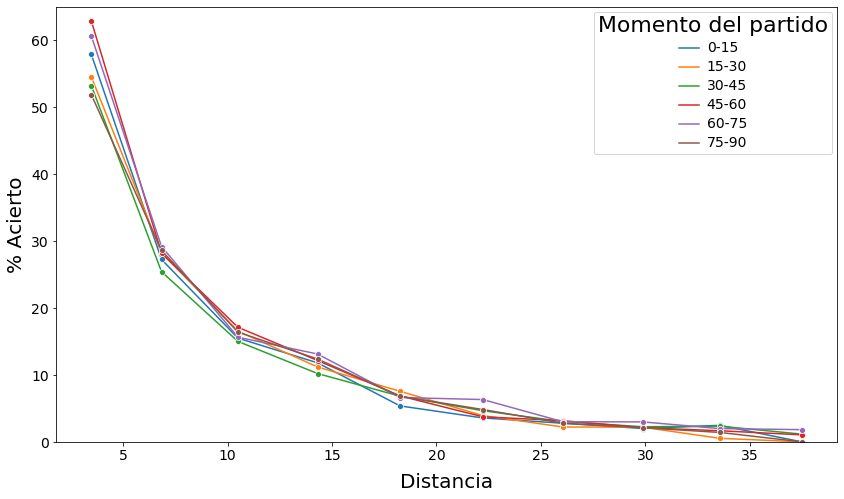

In [9]:
fig = plt.gcf()
fig.set_size_inches( 14, 8)
ax=sns.lineplot(x="distance_bins", y="goal", estimator=lambda y: sum(y==1)*100.0/len(y), hue="match_moment", 
                data=df_non_penaltyv, ci=None, marker='o')
ax.legend(title = "Momento del partido")
ax.set(ylim=(0.0, 65))
plt.setp(ax.get_legend().get_texts(), fontsize='14')
plt.setp(ax.get_legend().get_title(), fontsize='22')
ax.set_ylabel('% Acierto', fontsize=20, labelpad=5)
ax.set_xlabel('Distancia', fontsize=20, labelpad=10)
ax.tick_params(axis='both', which='major', labelsize=14)

Graphic of the % Succes of shots at diferent distances by type of competition

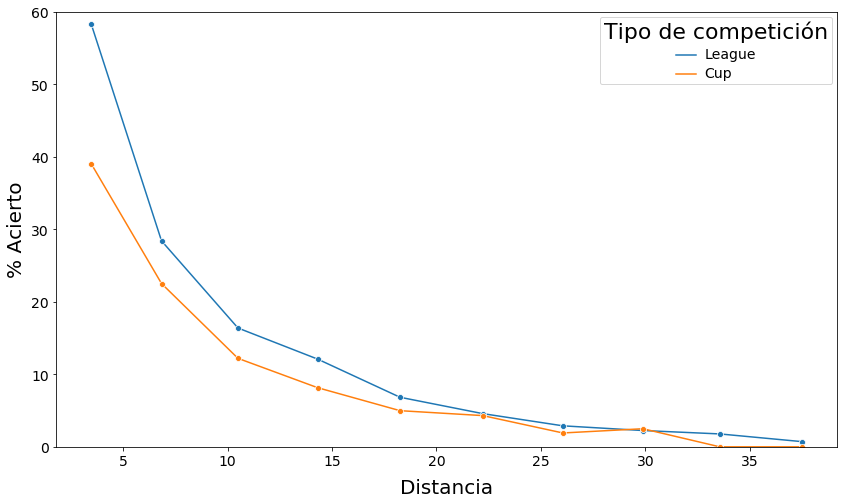

In [10]:
fig = plt.gcf()
fig.set_size_inches( 14, 8)
ax=sns.lineplot(x="distance_bins", y="goal", estimator=lambda y: sum(y==1)*100.0/len(y), hue="competition_type", 
                data=df_non_penaltyv, ci=None, marker='o')
ax.set(ylim=(0.0, 60))
ax.legend(title = "Tipo de competición")
plt.setp(ax.get_legend().get_texts(), fontsize='14')
plt.setp(ax.get_legend().get_title(), fontsize='22')
ax.set_ylabel('% Acierto', fontsize=20, labelpad=5)
ax.set_xlabel('Distancia', fontsize=20, labelpad=10)
ax.tick_params(axis='both', which='major', labelsize=14)

Graphic of the % Succes of shots at diferent distances by field factor

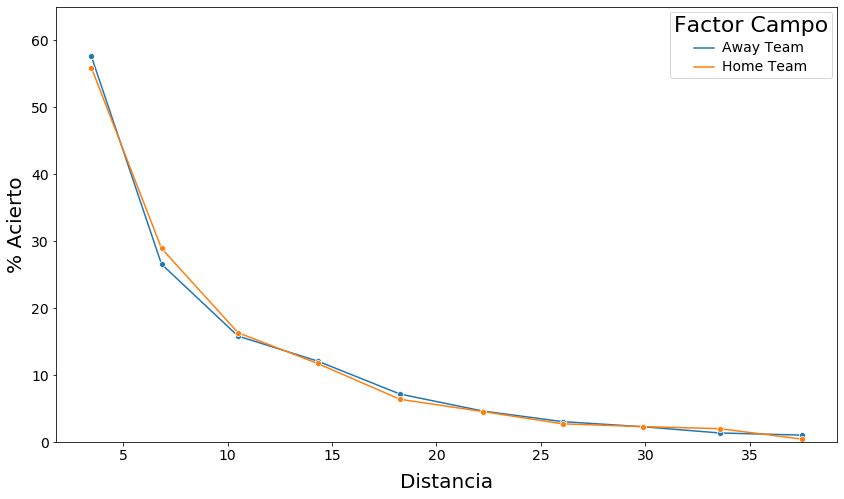

In [11]:
fig = plt.gcf()
fig.set_size_inches( 14, 8)
ax=sns.lineplot(x="distance_bins", y="goal", estimator=lambda y: sum(y==1)*100.0/len(y), hue="H_A_column", 
                data=df_non_penaltyv, ci=None, marker='o')
ax.set(ylim=(0.0, 65))
ax.legend(title = "Factor Campo")
plt.setp(ax.get_legend().get_texts(), fontsize='14')
plt.setp(ax.get_legend().get_title(), fontsize='22')
ax.set_ylabel('% Acierto', fontsize=20, labelpad=5)
ax.set_xlabel('Distancia', fontsize=20, labelpad=10)
ax.tick_params(axis='both', which='major', labelsize=14)

Pivot table of the % Succes of shots at diferent competition parts

In [12]:
pt2 = pd.pivot_table(df_non_penaltyv, values='goal', index=['competition_part'],
                    columns=['distance_bins'], aggfunc=np.mean)
pt2 = pt2*100
pt2

distance_bins,3.477521,6.837096,10.496876,14.311126,18.254915,22.217547,26.051086,29.881339,33.558092,37.475057
competition_part,,,,,,,,,,
final,56.630824,28.873612,16.911986,12.018415,7.029635,4.617254,2.556818,1.847437,2.188552,0.000000
group,41.666667,20.147420,12.765957,7.952286,4.694836,4.147465,1.630435,2.419355,0.000000,0.000000
knockout,31.818182,29.496403,11.020408,8.571429,5.555556,4.705882,2.564103,2.654867,0.000000,0.000000
middle,59.800664,29.331942,15.823529,12.131464,6.675523,4.593070,2.801644,2.445961,1.386749,1.449275
start,58.275862,26.880466,16.448836,12.150026,6.804198,4.517454,3.318846,2.416756,1.788171,0.657895


Graphic of the % Succes of shots at diferent distances by part of the competition (only league matches)

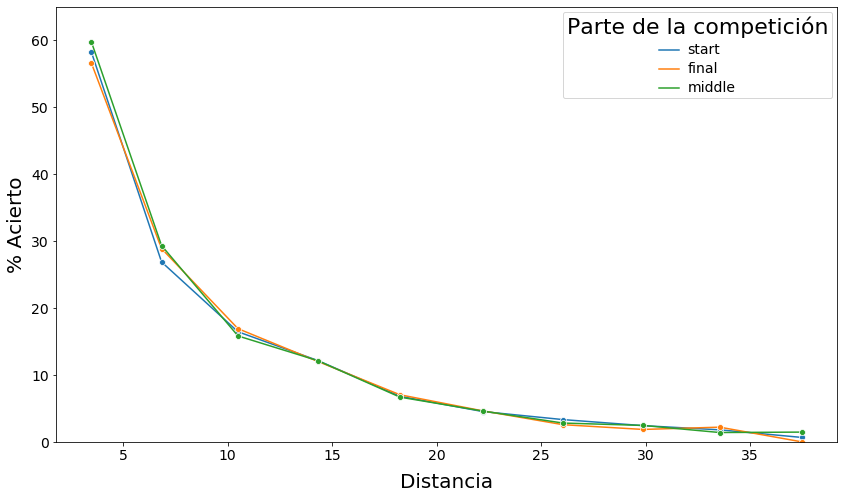

In [13]:
df_non_penaltyv = df_non_penalty[(df_non_penalty.competition_part != "group") & 
                                 (df_non_penalty.competition_part != "knockout")].copy()
df_non_penaltyv = df_non_penaltyv[df_non_penaltyv.distance_to_goal < 40].copy()
df_non_penaltyv['distance_bins'] = pd.cut(df_non_penaltyv['distance_to_goal'],bins=10)
df_non_penaltyv['distance_bins'] = df_non_penaltyv.groupby('distance_bins')['distance_to_goal'].transform('mean')
fig = plt.gcf()
fig.set_size_inches( 14, 8)
ax=sns.lineplot(x="distance_bins", y="goal", estimator=lambda y: sum(y==1)*100.0/len(y), hue="competition_part", 
                data=df_non_penaltyv, ci=None, marker='o')
ax.set(ylim=(0.0, 65))
ax.legend(title = "Parte de la competición")
plt.setp(ax.get_legend().get_texts(), fontsize='14')
plt.setp(ax.get_legend().get_title(), fontsize='22')
ax.set_ylabel('% Acierto', fontsize=20, labelpad=5)
ax.set_xlabel('Distancia', fontsize=20, labelpad=10)
ax.tick_params(axis='both', which='major', labelsize=14)

Graphic of the % Succes of shots at diferent distances by part of the competition (only cup matches)

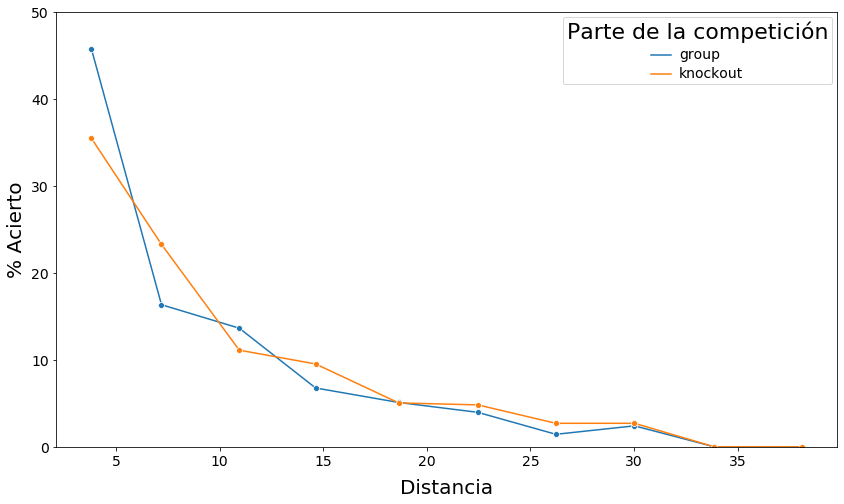

In [14]:
df_non_penaltyv = df_non_penalty[(df_non_penalty.competition_part == "group") | 
                                 (df_non_penalty.competition_part == "knockout")].copy()
df_non_penaltyv = df_non_penaltyv[df_non_penaltyv.distance_to_goal < 40].copy()
df_non_penaltyv['distance_bins'] = pd.cut(df_non_penaltyv['distance_to_goal'],bins=10)
df_non_penaltyv['distance_bins'] = df_non_penaltyv.groupby('distance_bins')['distance_to_goal'].transform('mean')
fig = plt.gcf()
fig.set_size_inches( 14, 8)
ax=sns.lineplot(x="distance_bins", y="goal", estimator=lambda y: sum(y==1)*100.0/len(y), hue="competition_part", 
                data=df_non_penaltyv, ci=None, marker='o')
ax.set(ylim=(0.0, 50))
ax.legend(title = "Parte de la competición")
plt.setp(ax.get_legend().get_texts(), fontsize='14')
plt.setp(ax.get_legend().get_title(), fontsize='22')
ax.set_ylabel('% Acierto', fontsize=20, labelpad=5)
ax.set_xlabel('Distancia', fontsize=20, labelpad=10)
ax.tick_params(axis='both', which='major', labelsize=14)

Show number of shots for every angle bin (created for an easier visualization)

In [15]:
df_non_penaltyv = df_non_penalty[df_non_penalty.visible_angle < 1].copy()
# df_non_penaltyv = df_non_penaltyv[df_non_penaltyv.visible_angle > 0.03].copy()
df_non_penaltyv['angle_bins'] = pd.cut(df_non_penaltyv['visible_angle'],bins=10)
df_non_penaltyv['angle_bins'] = df_non_penaltyv.groupby('angle_bins')['visible_angle'].transform('mean')*180/np.pi
g2=df_non_penaltyv.groupby(['angle_bins']).agg({'match_id':'count'})
g2

,match_id
angle_bins,
4.272199,174
9.883911,3761
14.379149,22470
19.717921,13261
25.657954,7770
31.275334,5468
36.978571,3657
42.548006,2226
48.142223,1805


Graphic of the % Succes of shots at diferent visible angles by match moment

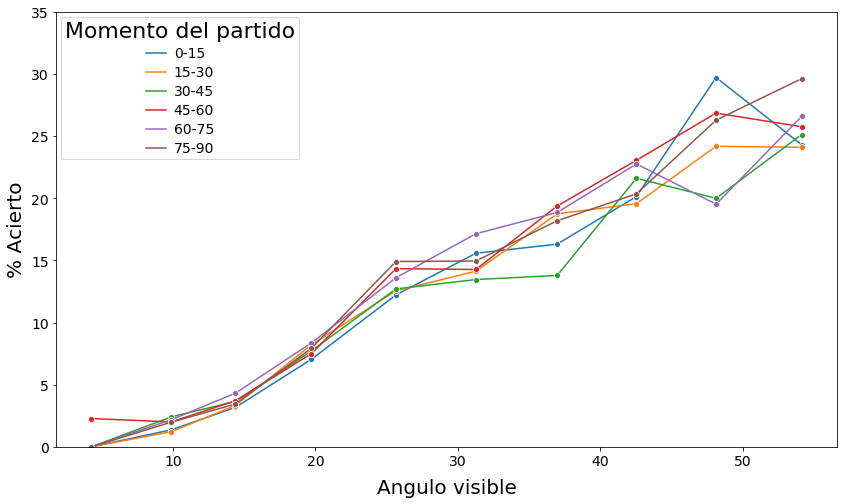

In [16]:
fig = plt.gcf()
fig.set_size_inches( 14, 8)
ax=sns.lineplot(x="angle_bins", y="goal", estimator=lambda y: sum(y==1)*100.0/len(y), hue="match_moment", 
                data=df_non_penaltyv, ci=None, marker='o')
ax.set(ylim=(0.0, 35))
ax.legend(title = "Momento del partido")
plt.setp(ax.get_legend().get_texts(), fontsize='14')
plt.setp(ax.get_legend().get_title(), fontsize='22')
ax.set_ylabel('% Acierto', fontsize=20, labelpad=5)
ax.set_xlabel('Angulo visible', fontsize=20, labelpad=10)
ax.tick_params(axis='both', which='major', labelsize=14)

Graphic of the % Succes of shots at diferent visible angles by competition type

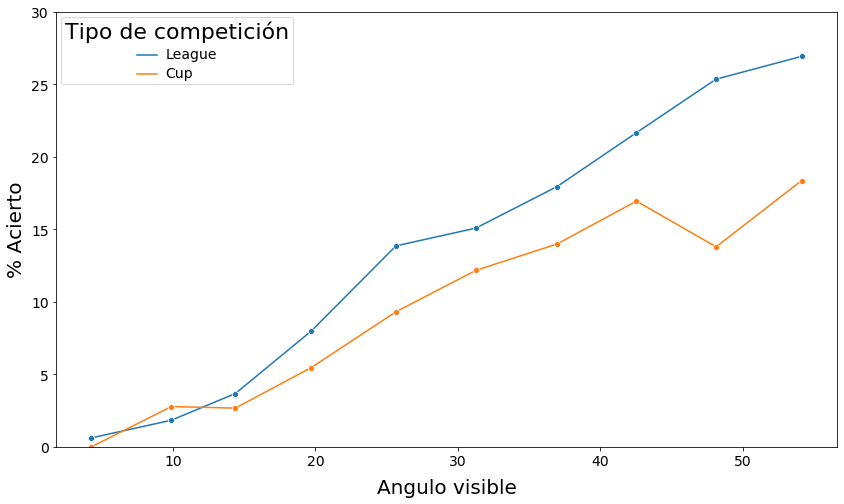

In [17]:
fig = plt.gcf()
fig.set_size_inches(14, 8)
ax=sns.lineplot(x="angle_bins", y="goal", estimator=lambda y: sum(y==1)*100.0/len(y), hue="competition_type", 
                data=df_non_penaltyv, ci=None, marker='o')
ax.set(ylim=(0.0, 30))
ax.legend(title = "Tipo de competición")
plt.setp(ax.get_legend().get_texts(), fontsize='14')
plt.setp(ax.get_legend().get_title(), fontsize='22')
ax.set_ylabel('% Acierto', fontsize=20, labelpad=5)
ax.set_xlabel('Angulo visible', fontsize=20, labelpad=10)
ax.tick_params(axis='both', which='major', labelsize=14)

Graphic of the % Succes of shots at diferent visible angles by field factor

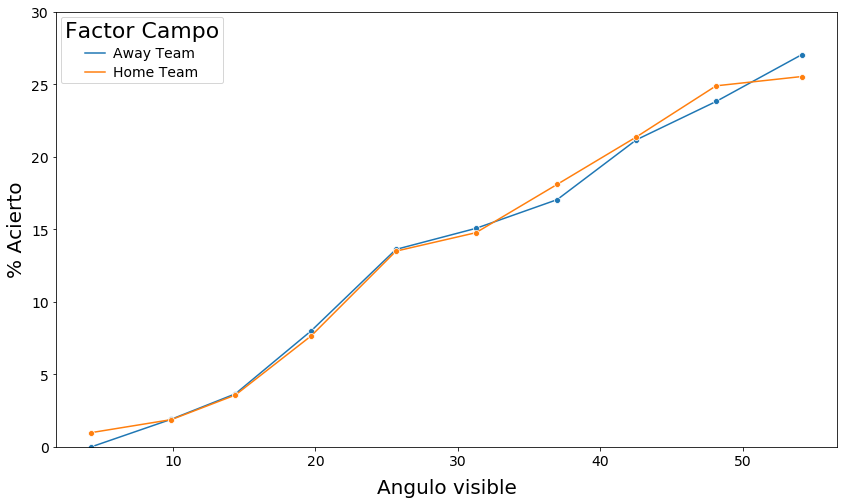

In [18]:
fig = plt.gcf()
fig.set_size_inches( 14, 8)
ax=sns.lineplot(x="angle_bins", y="goal", estimator=lambda y: sum(y==1)*100.0/len(y), hue="H_A_column", data=df_non_penaltyv, 
                ci=None, marker='o')
ax.set(ylim=(0.0, 30))
ax.legend(title = "Factor Campo")
plt.setp(ax.get_legend().get_texts(), fontsize='14')
plt.setp(ax.get_legend().get_title(), fontsize='22')
ax.set_ylabel('% Acierto', fontsize=20, labelpad=5)
ax.set_xlabel('Angulo visible', fontsize=20, labelpad=10)
ax.tick_params(axis='both', which='major', labelsize=14)

Graphic of the % Succes of shots at diferent visible angles by part of the competition (only league matches)

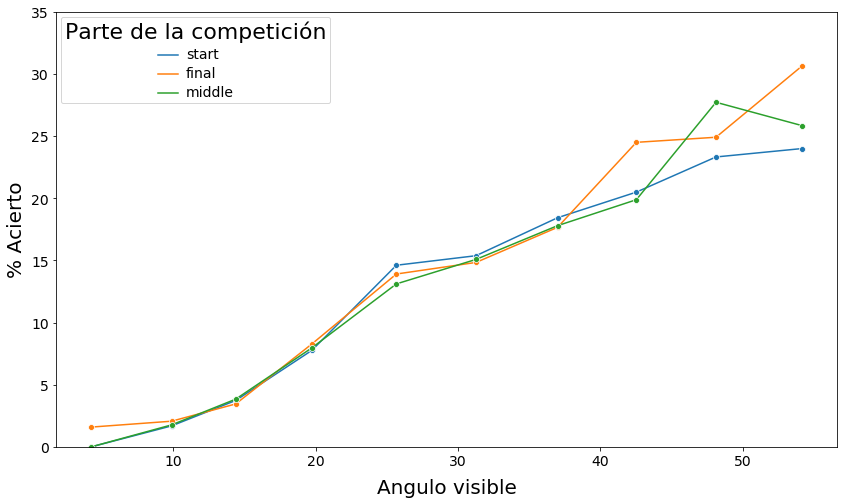

In [19]:
df_non_penaltyv = df_non_penalty[(df_non_penalty.competition_part != "group") & 
                                 (df_non_penalty.competition_part != "knockout")].copy()
df_non_penaltyv = df_non_penaltyv[df_non_penaltyv.visible_angle < 1].copy()
df_non_penaltyv['angle_bins'] = pd.cut(df_non_penaltyv['visible_angle'],bins=10)
df_non_penaltyv['angle_bins'] = df_non_penaltyv.groupby('angle_bins')['visible_angle'].transform('mean')*180/np.pi

fig = plt.gcf()
fig.set_size_inches( 14, 8)
ax=sns.lineplot(x="angle_bins", y="goal", estimator=lambda y: sum(y==1)*100.0/len(y), hue="competition_part", 
                data=df_non_penaltyv, ci=None, marker='o')
ax.set(ylim=(0.0, 35))
ax.legend(title = "Parte de la competición")
plt.setp(ax.get_legend().get_texts(), fontsize='14')
plt.setp(ax.get_legend().get_title(), fontsize='22')
ax.set_ylabel('% Acierto', fontsize=20, labelpad=5)
ax.set_xlabel('Angulo visible', fontsize=20, labelpad=10)
ax.tick_params(axis='both', which='major', labelsize=14)

Graphic of the % Succes of shots at diferent visible angles by part of the competition (only cup matches)

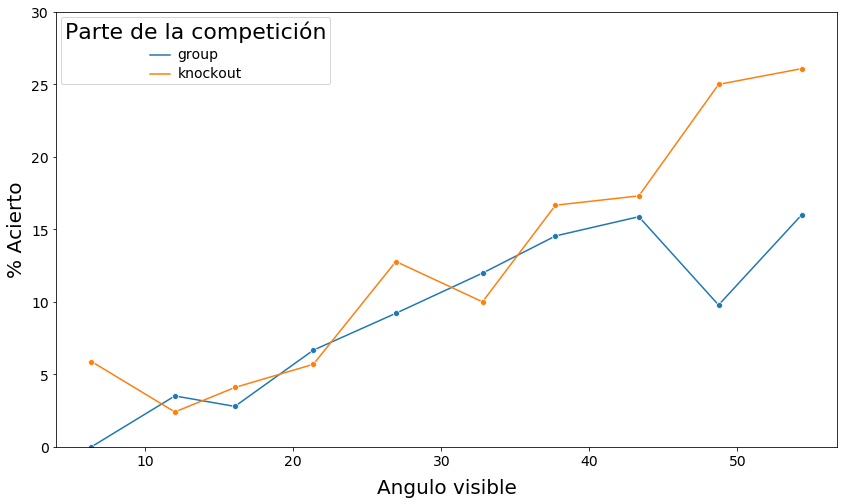

In [20]:
df_non_penaltyv = df_non_penalty[(df_non_penalty.competition_part == "group") |
                                 (df_non_penalty.competition_part == "knockout")].copy()
df_non_penaltyv = df_non_penaltyv[df_non_penaltyv.visible_angle < 1].copy()
df_non_penaltyv['angle_bins'] = pd.cut(df_non_penaltyv['visible_angle'],bins=10)
df_non_penaltyv['angle_bins'] = df_non_penaltyv.groupby('angle_bins')['visible_angle'].transform('mean')*180/np.pi

fig = plt.gcf()
fig.set_size_inches( 14, 8)
ax=sns.lineplot(x="angle_bins", y="goal", estimator=lambda y: sum(y==1)*100.0/len(y), hue="competition_part", 
                data=df_non_penaltyv, ci=None, marker='o')
ax.set(ylim=(0.0, 30))
ax.legend(title = "Parte de la competición")
plt.setp(ax.get_legend().get_texts(), fontsize='14')
plt.setp(ax.get_legend().get_title(), fontsize='22')
ax.set_ylabel('% Acierto', fontsize=20, labelpad=5)
ax.set_xlabel('Angulo visible', fontsize=20, labelpad=10)
ax.tick_params(axis='both', which='major', labelsize=14)

Graphic of the % Succes of shots at diferent distances by own team players

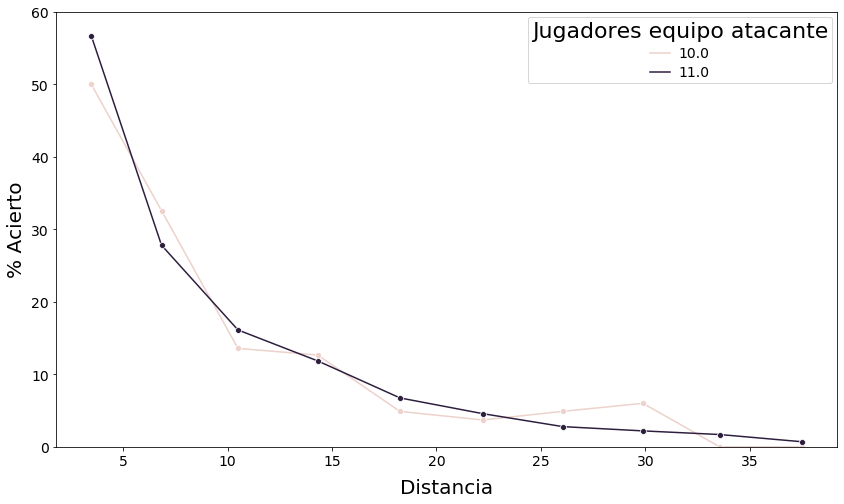

In [21]:
df_non_penaltyv = df_non_penalty[df_non_penalty.players > 9].copy()
df_non_penaltyv = df_non_penaltyv[df_non_penaltyv.distance_to_goal < 40].copy()
df_non_penaltyv['distance_bins'] = pd.cut(df_non_penaltyv['distance_to_goal'],bins=10)
df_non_penaltyv['distance_bins'] = df_non_penaltyv.groupby('distance_bins')['distance_to_goal'].transform('mean')
fig = plt.gcf()
fig.set_size_inches( 14, 8)
ax=sns.lineplot(x="distance_bins", y="goal", estimator=lambda y: sum(y==1)*100.0/len(y), hue="players", data=df_non_penaltyv, 
                ci=None, marker='o')
ax.set(ylim=(0.0, 60))
ax.legend(title = "Jugadores equipo atacante")
plt.setp(ax.get_legend().get_texts(), fontsize='14')
plt.setp(ax.get_legend().get_title(), fontsize='22')
ax.set_ylabel('% Acierto', fontsize=20, labelpad=5)
ax.set_xlabel('Distancia', fontsize=20, labelpad=10)
ax.tick_params(axis='both', which='major', labelsize=14)

Graphic of the % Succes of shots at diferent visible angles by own team players

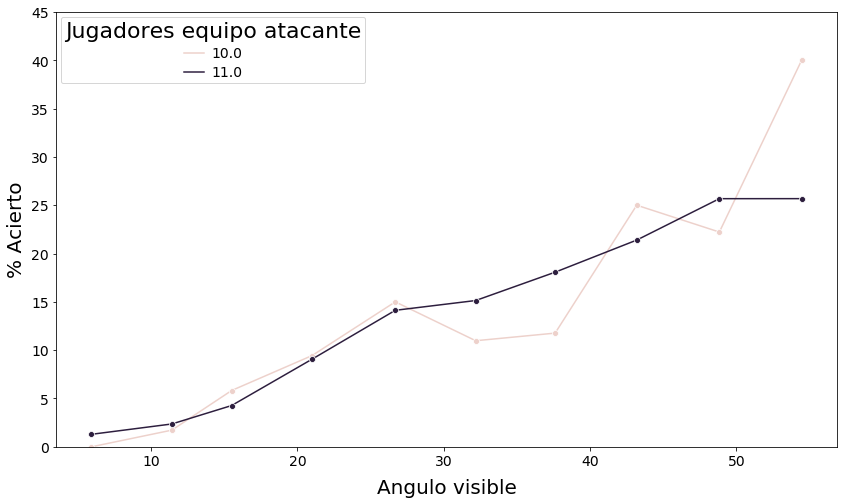

In [22]:
df_non_penaltyv = df_non_penalty[df_non_penalty.players > 9].copy()
df_non_penaltyv = df_non_penaltyv[df_non_penaltyv.visible_angle < 1].copy()
df_non_penaltyv = df_non_penaltyv[df_non_penaltyv.visible_angle > 0.03].copy()
df_non_penaltyv['angle_bins'] = pd.cut(df_non_penaltyv['visible_angle'],bins=10)
df_non_penaltyv['angle_bins'] = df_non_penaltyv.groupby('angle_bins')['visible_angle'].transform('mean')*180/np.pi
fig = plt.gcf()
fig.set_size_inches( 14, 8)
ax=sns.lineplot(x="angle_bins", y="goal", estimator=lambda y: sum(y==1)*100.0/len(y), hue="players", data=df_non_penaltyv, 
                ci=None, marker='o')
ax.set(ylim=(0.0, 45))
ax.legend(title = "Jugadores equipo atacante")
plt.setp(ax.get_legend().get_texts(), fontsize='14')
plt.setp(ax.get_legend().get_title(), fontsize='22')
ax.set_ylabel('% Acierto', fontsize=20, labelpad=5)
ax.set_xlabel('Angulo visible', fontsize=20, labelpad=10)
ax.tick_params(axis='both', which='major', labelsize=14)

Graphic of the % Succes of shots at diferent distances by rival team players

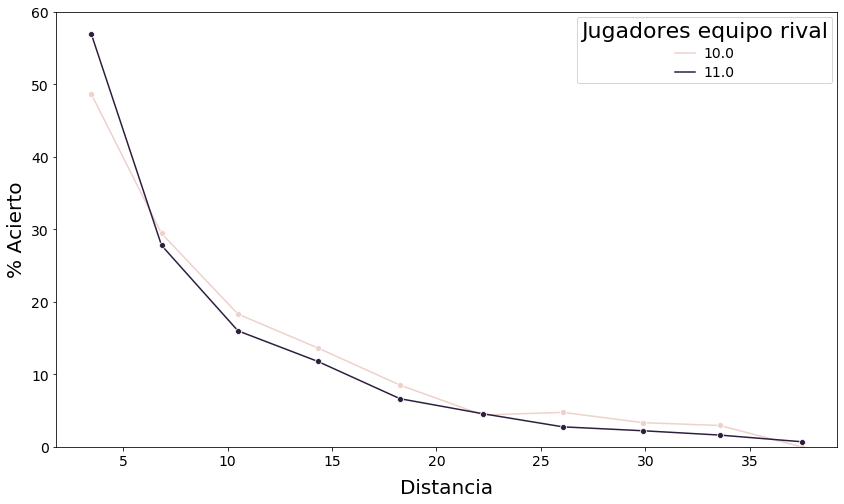

In [23]:
df_non_penaltyv = df_non_penalty[df_non_penalty.players_rival > 9].copy()
df_non_penaltyv = df_non_penaltyv[df_non_penaltyv.distance_to_goal < 40].copy()
df_non_penaltyv['distance_bins'] = pd.cut(df_non_penaltyv['distance_to_goal'],bins=10)
df_non_penaltyv['distance_bins'] = df_non_penaltyv.groupby('distance_bins')['distance_to_goal'].transform('mean')
fig = plt.gcf()
fig.set_size_inches( 14, 8)
ax=sns.lineplot(x="distance_bins", y="goal", estimator=lambda y: sum(y==1)*100.0/len(y), hue="players_rival", 
                data=df_non_penaltyv, ci=None, marker='o')
ax.set(ylim=(0.0, 60))
ax.legend(title = "Jugadores equipo rival")
plt.setp(ax.get_legend().get_texts(), fontsize='14')
plt.setp(ax.get_legend().get_title(), fontsize='22')
ax.set_ylabel('% Acierto', fontsize=20, labelpad=5)
ax.set_xlabel('Distancia', fontsize=20, labelpad=10)
ax.tick_params(axis='both', which='major', labelsize=14)

Graphic of the % Succes of shots at diferent visible angles by rival team players

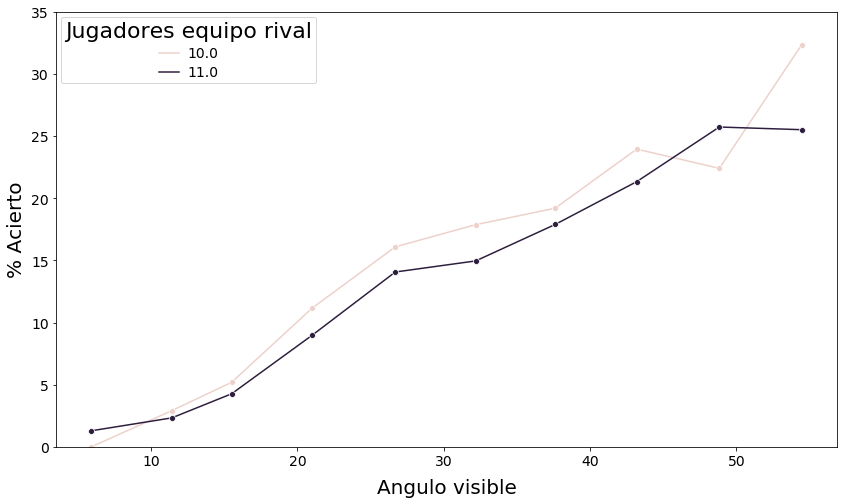

In [24]:
df_non_penaltyv = df_non_penalty[df_non_penalty.players_rival > 9].copy()
df_non_penaltyv = df_non_penaltyv[df_non_penaltyv.visible_angle < 1].copy()
df_non_penaltyv = df_non_penaltyv[df_non_penaltyv.visible_angle > 0.03].copy()
df_non_penaltyv['angle_bins'] = pd.cut(df_non_penaltyv['visible_angle'],bins=10)
df_non_penaltyv['angle_bins'] = df_non_penaltyv.groupby('angle_bins')['visible_angle'].transform('mean')*180/np.pi
fig = plt.gcf()
fig.set_size_inches( 14, 8)
ax=sns.lineplot(x="angle_bins", y="goal", estimator=lambda y: sum(y==1)*100.0/len(y), hue="players_rival", 
                data=df_non_penaltyv, ci=None, marker='o')
ax.set(ylim=(0.0, 35))
ax.legend(title = "Jugadores equipo rival")
plt.setp(ax.get_legend().get_texts(), fontsize='14')
plt.setp(ax.get_legend().get_title(), fontsize='22')
ax.set_ylabel('% Acierto', fontsize=20, labelpad=5)
ax.set_xlabel('Angulo visible', fontsize=20, labelpad=10)
ax.tick_params(axis='both', which='major', labelsize=14)

Graphic of the % Succes of shots and distance from goal for every number of shot of the team.

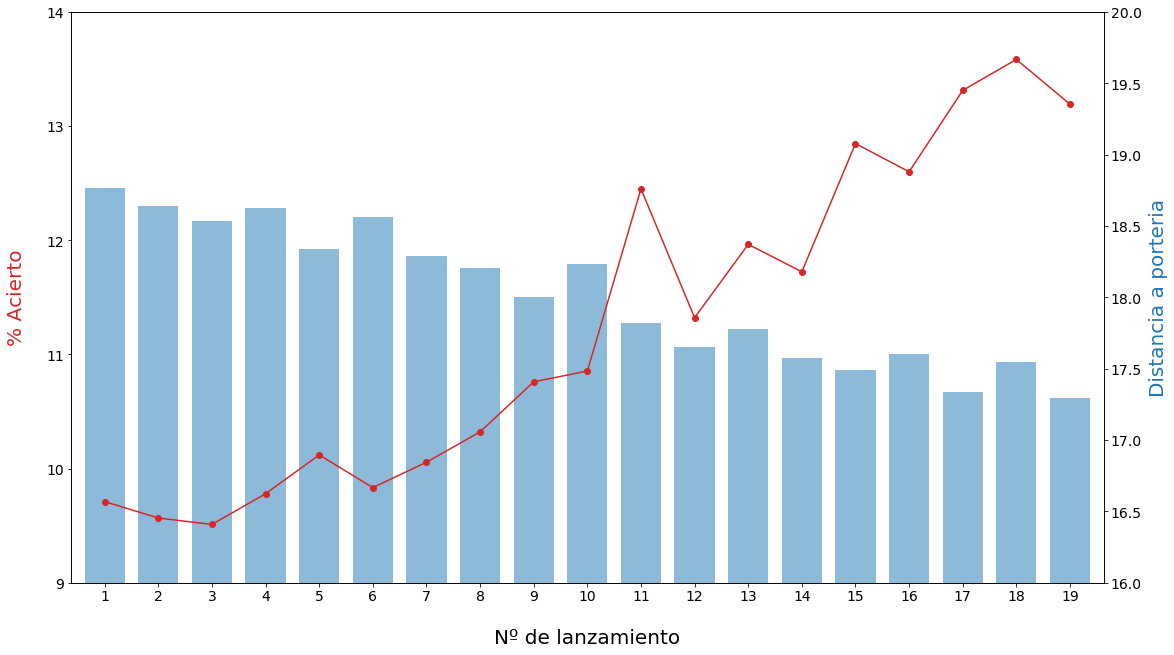

In [25]:
df_non_penaltyv = df_non_penalty[df_non_penalty.shot_number < 20].copy()
g = df_non_penaltyv.groupby('shot_number')[['goal','distance_to_goal']].mean()
g.reset_index()
g['goal'] = (g.goal)*100
g['shot_number'] = ("1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19")
color = 'tab:blue'
ax = g.plot.bar(x="shot_number", y="distance_to_goal", legend=False,  color = color, alpha=0.5, width = 0.75)
color = 'tab:red'
ax.set_ylabel('% Acierto', fontsize=20, labelpad=45, color = color)
ax.set_xlabel('Nº de lanzamiento', fontsize=20, labelpad=25)
ax2 = ax.twinx()
ax.set(ylim=(16, 20))
ax2.set(ylim=(9, 14))
g.plot(x="shot_number", y="goal", legend=False, marker='o', ax=ax2, color = color)
color = 'tab:blue'
ax2.set_ylabel('Distancia a porteria', fontsize=20, labelpad=45, color = color)
ax.yaxis.tick_right()
ax2.yaxis.tick_left()
ax.tick_params(axis='both', which='major', labelsize=14)
ax2.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(labelrotation=0)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

Graphic of the % Succes of shots and distance from goal for every number of shot of the player.

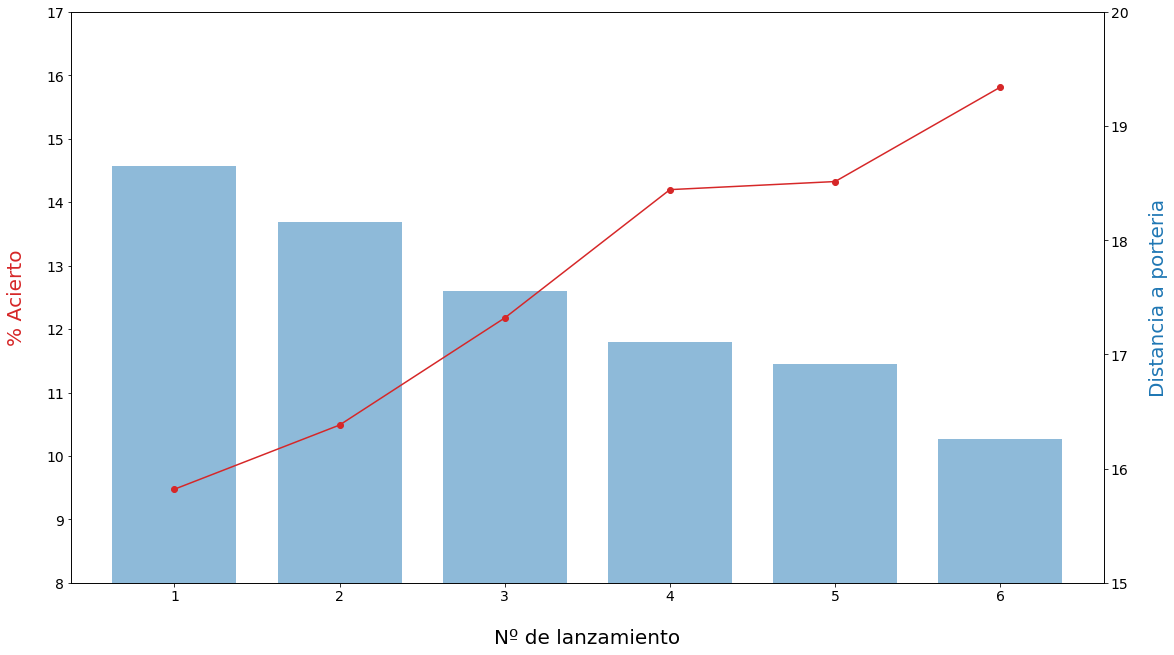

In [26]:
df_non_penaltyv = df_non_penalty[df_non_penalty.shot_player_number < 7].copy()
g = df_non_penaltyv.groupby('shot_player_number')[['goal','distance_to_goal']].mean()
g.reset_index()
g['goal'] = (g.goal)*100
g['shot_player_number'] = ("1","2","3","4","5","6")
color = 'tab:blue'
ax = g.plot.bar(x="shot_player_number", y="distance_to_goal", legend=False,  color = color, alpha=0.5, width = 0.75)
color = 'tab:red'
ax.set_ylabel('% Acierto', fontsize=20, labelpad=45, color = color)
ax.set_xlabel('Nº de lanzamiento', fontsize=20, labelpad=25)
ax2 = ax.twinx()
ax.set(ylim=(15, 20))
ax2.set(ylim=(8, 17))
g.plot(x="shot_player_number", y="goal", legend=False, marker='o', ax=ax2, color = color)
color = 'tab:blue'
ax2.set_ylabel('Distancia a porteria', fontsize=20, labelpad=45, color = color)
ax.yaxis.tick_right()
ax2.yaxis.tick_left()
ax.tick_params(axis='both', which='major', labelsize=14)
ax2.tick_params(axis='both', which='major', labelsize=14)
ax.tick_params(labelrotation=0)
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)

Graphic of the % Succes of shots for every number of shot of the team in specific match zones.

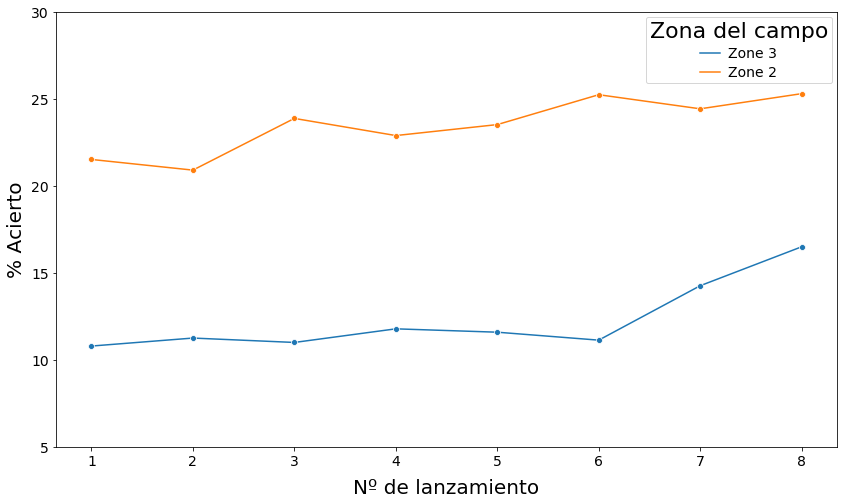

In [27]:
df_non_penaltyv = df_non_penalty[df_non_penalty.shot_zone_number < 9].copy()
df_non_penaltyv = df_non_penaltyv[(df_non_penaltyv.shot_zone == "Zone 2") | (df_non_penaltyv.shot_zone == "Zone 3")].copy()
fig = plt.gcf()
fig.set_size_inches( 14, 8)
ax=sns.lineplot(x="shot_zone_number", y="goal",  hue="shot_zone",data=df_non_penaltyv, 
                estimator=lambda y: sum(y==1)*100.0/len(y), ci=None, marker='o')
ax.set(ylim=(5, 30))
ax.legend(title = "Zona del campo")
plt.setp(ax.get_legend().get_texts(), fontsize='14')
plt.setp(ax.get_legend().get_title(), fontsize='22')
ax.set_ylabel('% Acierto', fontsize=20, labelpad=5)
ax.set_xlabel('Nº de lanzamiento', fontsize=20, labelpad=10)
ax.tick_params(axis='both', which='major', labelsize=14)

Graphic of the % Succes of shots for every number of shot of the player in specific match zones.

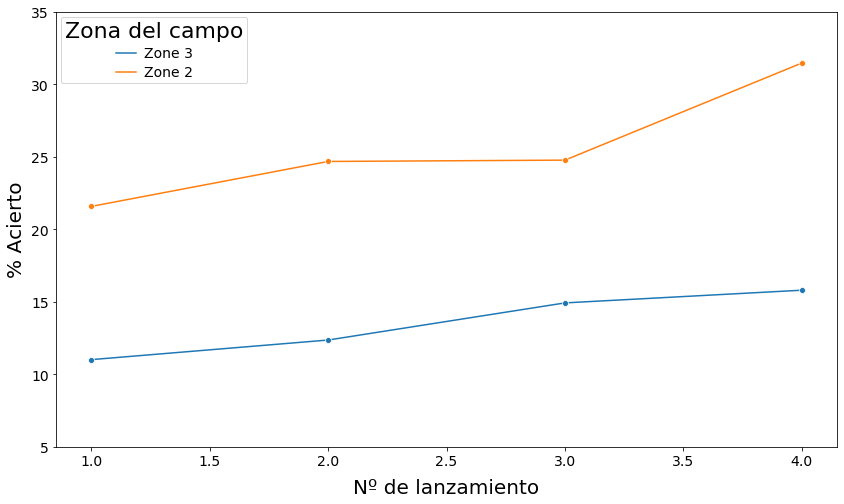

In [28]:
df_non_penaltyv = df_non_penalty[df_non_penalty.shot_zone_player_number < 5].copy()
df_non_penaltyv = df_non_penaltyv[(df_non_penaltyv.shot_zone == "Zone 2") | (df_non_penaltyv.shot_zone == "Zone 3")].copy()
fig = plt.gcf()
fig.set_size_inches( 14, 8)
ax=sns.lineplot(x="shot_zone_player_number", y="goal", estimator=lambda y: sum(y==1)*100.0/len(y), hue="shot_zone", 
                data=df_non_penaltyv, ci=None, marker='o')
ax.set(ylim=(5, 35))
ax.legend(title = "Zona del campo")
plt.setp(ax.get_legend().get_texts(), fontsize='14')
plt.setp(ax.get_legend().get_title(), fontsize='22')
ax.set_ylabel('% Acierto', fontsize=20, labelpad=5)
ax.set_xlabel('Nº de lanzamiento', fontsize=20, labelpad=10)
ax.tick_params(axis='both', which='major', labelsize=14)

# Penalty shots

Show all the penalty columns

In [29]:
df_penalty.head()

,match_id,dataset,statsbomb_id,wyscout_id,statsbomb_team_id,wyscout_team_id,team_id,team_name,player_id_statsbomb,player_id_wyscout,player_id,Name,firstName,middleName,lastName,competition_gender,competition_name,competition_type,match_week,competition_part,H_A_column,minute,match_moment,shot_number,shot_player_number,players,players_rival,goal
255,22912,statsbomb,642e3db4-bfa4-4ed2-9a22-468e68bd6e0a,NaN,24.0,NaN,219,Liverpool,3531.0,NaN,12,Mohamed Salah,Mohamed,,Salah,male,Champions League,Cup,13.0,knockout,Away Team,1.809467,0-15,1.0,1.0,11.0,11.0,True
335,19790,statsbomb,7de52ec3-eec3-4c62-a5a8-a604877907bb,NaN,746.0,NaN,146,Manchester City WFC,4654.0,NaN,2390,Nikita Parris,Nikita,,Parris,female,FA Women's Super League,League,15.0,final,Home Team,2.255517,0-15,1.0,1.0,11.0,11.0,True
508,68354,statsbomb,33d46a14-0366-4718-bdd1-74f1c5423d17,NaN,217.0,NaN,175,Barcelona,25879.0,NaN,2297,Ronaldo de Assis Moreira,Ronaldo,de Assis,Moreira,male,La Liga,League,13.0,middle,Home Team,3.111500,0-15,1.0,1.0,11.0,11.0,False
569,7576,statsbomb,e6f0cb10-4f5d-40fc-965a-47effe26cbe7,NaN,780.0,NaN,201,Portugal,5207.0,NaN,34,Cristiano Ronaldo dos Santos Aveiro,Cristiano,Ronaldo dos Santos,Aveiro,male,FIFA World Cup,Cup,1.0,group,Home Team,3.467333,0-15,1.0,1.0,11.0,11.0,True
790,22981,statsbomb,a1a592be-425c-49e9-90b0-6e8638b07500,NaN,852.0,NaN,112,Norway Women's,10386.0,NaN,2516,Caroline Graham Hansen,Caroline,Graham,Hansen,female,Women's World Cup,Cup,3.0,group,Away Team,4.573400,0-15,1.0,1.0,11.0,11.0,True


Graphic of the % Succes of penalties by competition type.

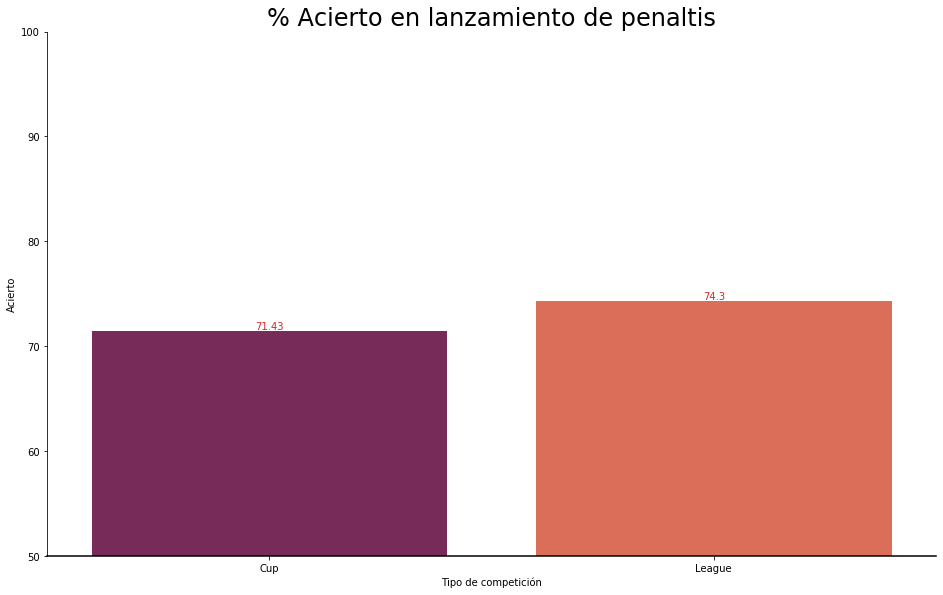

In [30]:
g = df_penalty.groupby('competition_type')[['goal']].mean()
g = g.sort_values(['goal']).reset_index()
g['goal'] = round(g.goal,4)*100
ax = sns.barplot(x="competition_type", y="goal", palette="rocket", data=g, ci=None)
ax.set(ylim=(50, 100))
ax.axhline(50, color="k", clip_on=False)
ax.set_title("% Acierto en lanzamiento de penaltis", size=24)
ax.set_ylabel("Acierto")
ax.set_xlabel("Tipo de competición")
ax.set_xticklabels(g.competition_type)
for i, v in enumerate(g["goal"].iteritems()):        
    ax.text(i ,v[1], "{:,}".format(v[1]), color='tab:red', va ='bottom', ha ='center')
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)
fig = plt.gcf()
fig.set_size_inches(18, 10)

Graphic of the % Succes of penalties by competition part.

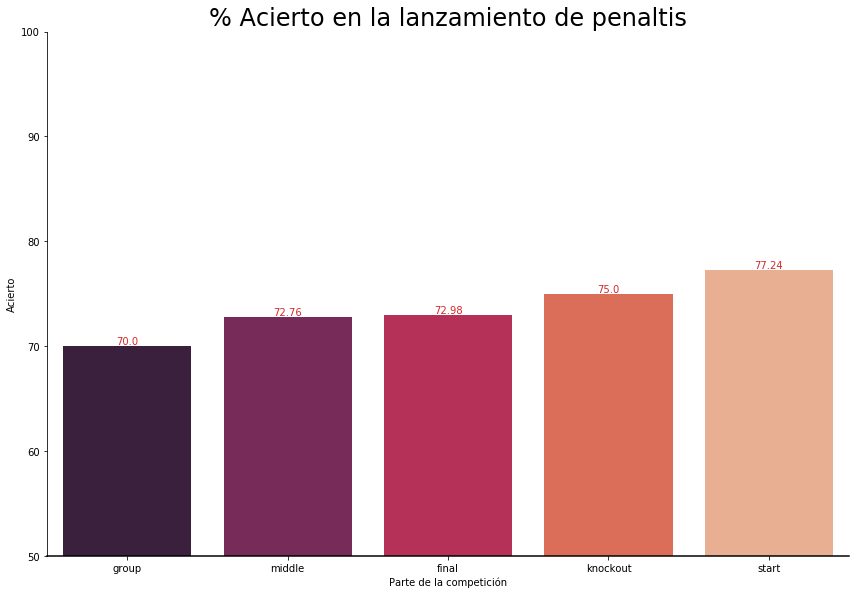

In [31]:
g = df_penalty.groupby('competition_part')[['goal']].mean()
g = g.sort_values(['goal']).reset_index()
g['goal'] = round(g.goal,4)*100
ax = sns.barplot(x="competition_part", y="goal", palette="rocket", data=g, ci=None)
ax.set(ylim=(50, 100))
ax.axhline(50, color="k", clip_on=False)
ax.set_title("% Acierto en la lanzamiento de penaltis", size=24)
ax.set_ylabel("Acierto")
ax.set_xlabel("Parte de la competición")
ax.set_xticklabels(g.competition_part)
for i, v in enumerate(g["goal"].iteritems()):        
    ax.text(i ,v[1], "{:,}".format(v[1]), color='tab:red', va ='bottom', ha ='center')
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)
fig = plt.gcf()
fig.set_size_inches(18, 10)

Graphic of the % Succes of penalties by match moment.

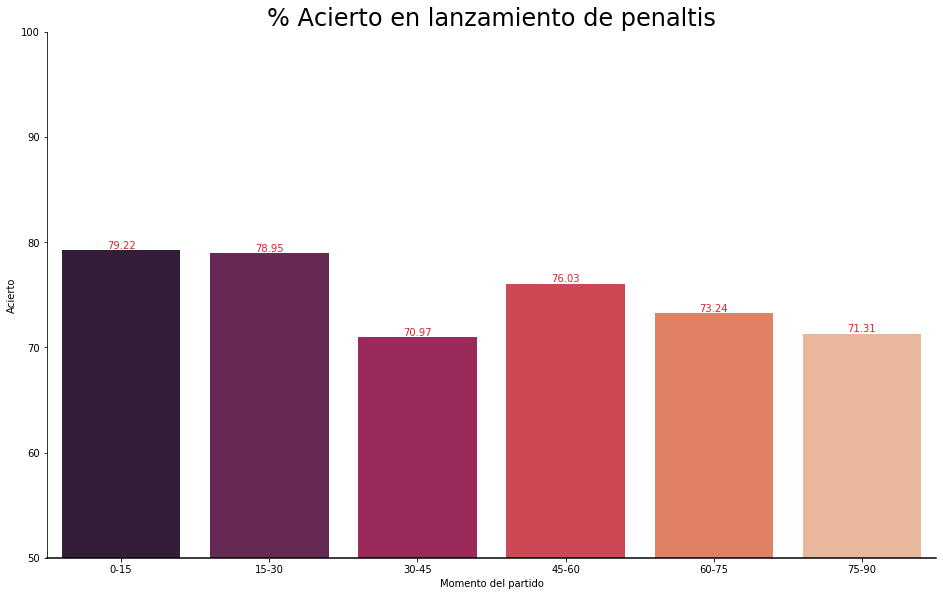

In [32]:
g = df_penalty.groupby('match_moment')[['goal']].mean()
g = g.reset_index()
g['goal'] = round(g.goal,4)*100
g.goal.replace(73.24000000000001, 73.24, inplace=True)
ax = sns.barplot(x="match_moment", y="goal", palette="rocket", data=g, ci=None)
ax.set(ylim=(50, 100))
ax.axhline(50, color="k", clip_on=False)
ax.set_title("% Acierto en lanzamiento de penaltis", size=24)
ax.set_ylabel("Acierto")
ax.set_xlabel("Momento del partido")
ax.set_xticklabels(g.match_moment)
for i, v in enumerate(g["goal"].iteritems()):        
    ax.text(i ,v[1], "{:,}".format(v[1]), color='tab:red', va ='bottom', ha ='center')
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)
fig = plt.gcf()
fig.set_size_inches(18, 10)

Graphic of the % Succes of penalties by field factor.

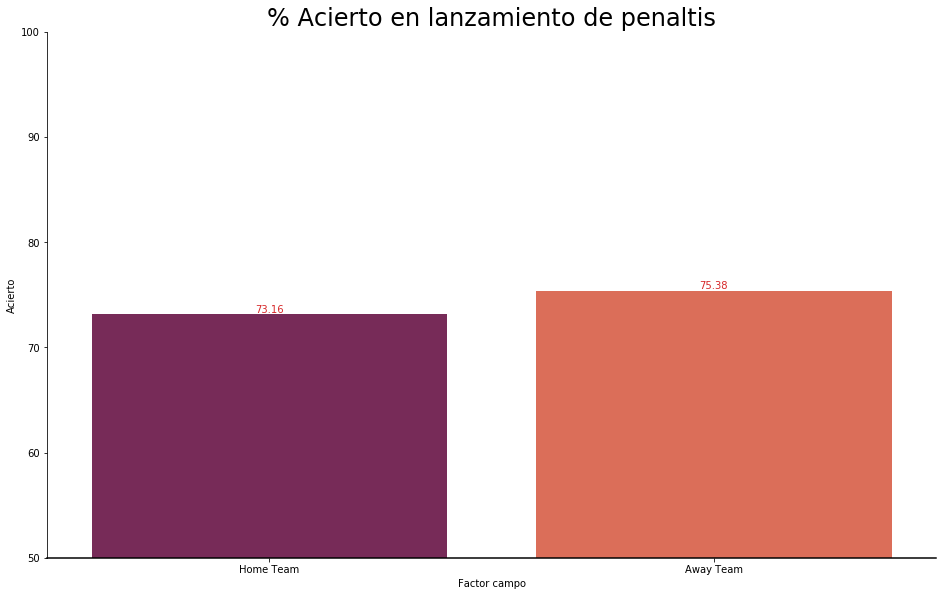

In [33]:
g = df_penalty.groupby('H_A_column')[['goal']].mean()
g = g.sort_values(['goal']).reset_index()
g['goal'] = round(g.goal,4)*100
ax = sns.barplot(x="H_A_column", y="goal", palette="rocket", data=g, ci=None)
ax.set(ylim=(50, 100))
ax.axhline(50, color="k", clip_on=False)
ax.set_title("% Acierto en lanzamiento de penaltis", size=24)
ax.set_ylabel("Acierto")
ax.set_xlabel("Factor campo")
ax.set_xticklabels(g.H_A_column)
for i, v in enumerate(g["goal"].iteritems()):        
    ax.text(i ,v[1], "{:,}".format(v[1]), color='tab:red', va ='bottom', ha ='center')
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)
fig = plt.gcf()
fig.set_size_inches(18, 10)

Graphic of the % Succes of penalties by number of the shot of the team.

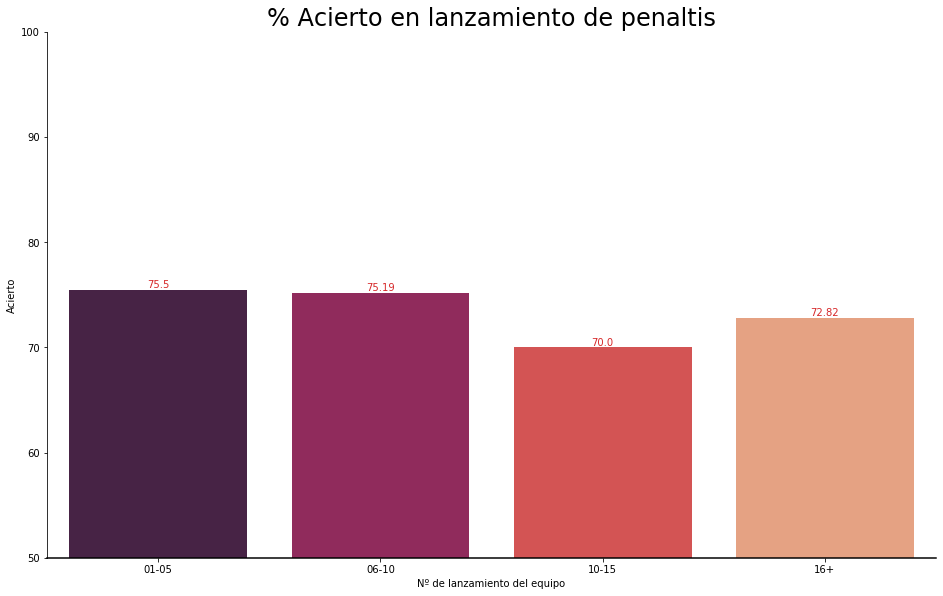

In [34]:
mask = df.shot_number > 15
df_penaltyv = df_penalty.copy()
df_penaltyv.loc[mask, "shot_number"] = "16+"
mask = (df.shot_number <= 15) & (df.shot_number > 9)
df_penaltyv.loc[mask, "shot_number"] = "10-15"
mask = (df.shot_number <= 10) & (df.shot_number > 5)
df_penaltyv.loc[mask, "shot_number"] = "06-10"
mask = (df.shot_number <= 5)
df_penaltyv.loc[mask, "shot_number"] = "01-05"
g = df_penaltyv.groupby('shot_number')[['goal']].mean()
g = g.sort_values(['shot_number']).reset_index()
g['goal'] = round(g.goal,4)*100
ax = sns.barplot(x="shot_number", y="goal", palette="rocket", data=g, ci=None)
ax.set(ylim=(50, 100))
ax.axhline(50, color="k", clip_on=False)
ax.set_title("% Acierto en lanzamiento de penaltis", size=24)
ax.set_ylabel("Acierto")
ax.set_xlabel("Nº de lanzamiento del equipo")
ax.set_xticklabels(g.shot_number)
for i, v in enumerate(g["goal"].iteritems()):        
    ax.text(i ,v[1], "{:,}".format(v[1]), color='tab:red', va ='bottom', ha ='center')
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)
fig = plt.gcf()
fig.set_size_inches(18, 10)

Graphic of the % Succes of penalties by number of the shot of the player.

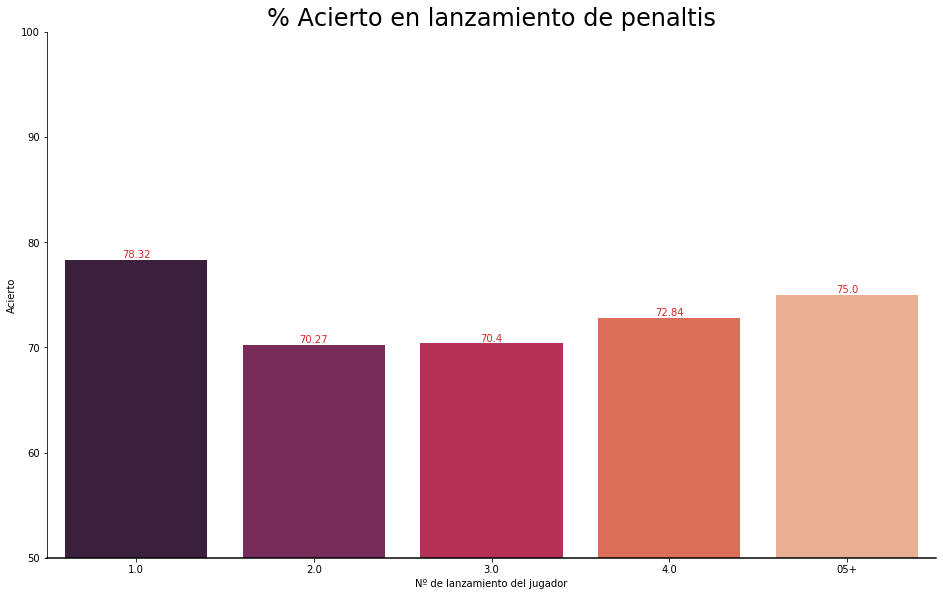

In [35]:
mask = df.shot_player_number >= 5
df_penaltyv = df_penalty.copy()
df_penaltyv.loc[mask, "shot_player_number"] = "05+"
g = df_penaltyv.groupby('shot_player_number')[['goal']].mean()
g = g.reset_index()
g['goal'] = round(g.goal,4)*100
g.goal.replace(78.320000000000001, 78.32, inplace=True)
g.goal.replace(70.39999999999999, 70.40, inplace=True)
ax = sns.barplot(x="shot_player_number", y="goal", palette="rocket", data=g, ci=None)
ax.set(ylim=(50, 100))
ax.axhline(50, color="k", clip_on=False)
ax.set_title("% Acierto en lanzamiento de penaltis", size=24)
ax.set_ylabel("Acierto")
ax.set_xlabel("Nº de lanzamiento del jugador")
ax.set_xticklabels(g.shot_player_number)
for i, v in enumerate(g["goal"].iteritems()):        
    ax.text(i ,v[1], "{:,}".format(v[1]), color='tab:red', va ='bottom', ha ='center')
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)
fig = plt.gcf()
fig.set_size_inches(18, 10)

Graphic of the % Succes of penalties by own team players.

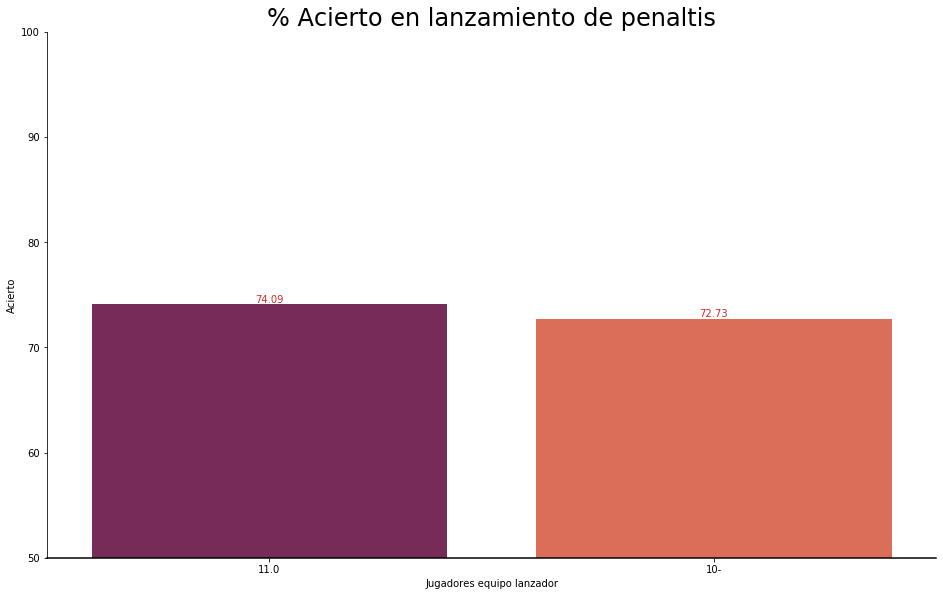

In [36]:
mask = df.players < 11
df_penaltyv = df_penalty.copy()
df_penaltyv.loc[mask, "players"] = "10-"
g = df_penaltyv.groupby('players')[['goal']].mean()
g = g.reset_index()
g['goal'] = round(g.goal,4)*100
g.goal.replace(72.72999999999999, 72.73, inplace=True)
ax = sns.barplot(x="players", y="goal", palette="rocket", data=g, ci=None)
ax.set(ylim=(50, 100))
ax.axhline(50, color="k", clip_on=False)
ax.set_title("% Acierto en lanzamiento de penaltis", size=24)
ax.set_ylabel("Acierto")
ax.set_xlabel("Jugadores equipo lanzador")
ax.set_xticklabels(g.players)
for i, v in enumerate(g["goal"].iteritems()):        
    ax.text(i ,v[1], "{:,}".format(v[1]), color='tab:red', va ='bottom', ha ='center')
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)
fig = plt.gcf()
fig.set_size_inches(18, 10)

Graphic of the % Succes of penalties by rival team players.

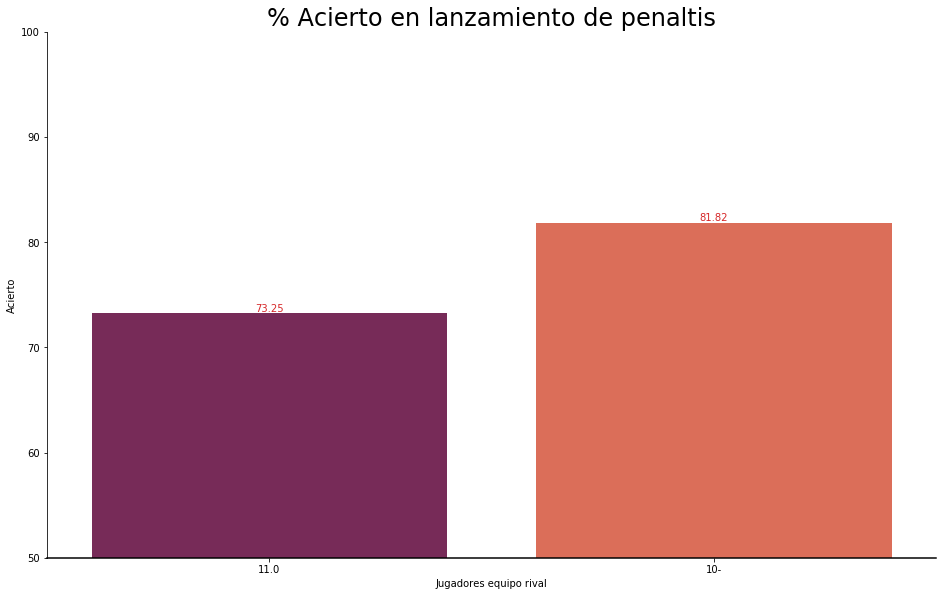

In [37]:
mask = df.players_rival < 11
df_penaltyv = df_penalty.copy()
df_penaltyv.loc[mask, "players_rival"] = "10-"
g = df_penaltyv.groupby('players_rival')[['goal']].mean()
g = g.reset_index()
g['goal'] = round(g.goal,4)*100
g.goal.replace(81.82000000000001, 81.82, inplace=True)
ax = sns.barplot(x="players_rival", y="goal", palette="rocket", data=g, ci=None)
ax.set(ylim=(50, 100))
ax.axhline(50, color="k", clip_on=False)
ax.set_title("% Acierto en lanzamiento de penaltis", size=24)
ax.set_ylabel("Acierto")
ax.set_xlabel("Jugadores equipo rival")
ax.set_xticklabels(g.players_rival)
for i, v in enumerate(g["goal"].iteritems()):        
    ax.text(i ,v[1], "{:,}".format(v[1]), color='tab:red', va ='bottom', ha ='center')
sns.despine(bottom=True)
plt.tight_layout(h_pad=2)
fig = plt.gcf()
fig.set_size_inches(18, 10)